<a href="https://colab.research.google.com/github/agwn1819/EINT_SS_19/blob/master/Masterarbeit_SVM_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Type : Multi-Class Classification
### Classification Algorithm : Decision Tree, SVM, Logistic Regression

In [111]:
#### import Library
import numpy as np
import pandas as pd
import glob, os
import itertools
from itertools import *
import time

# Plotting a Pairplot with sns
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from datetime import datetime

# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# from sklearn.inspection import 
# DecisionBoundaryDisplay

In [112]:
# Python Program to Convert seconds
# into hours, minutes and seconds

def convert(seconds):
	seconds = seconds % (24 * 3600)
	hour = seconds // 3600
	seconds %= 3600
	minutes = seconds // 60
	seconds %= 60
	
	return "%d:%02d:%02d" % (hour, minutes, seconds)


####  Import Dataset

In [113]:
path_dir_riskuser = "/content/drive/MyDrive/Masterarbeit_2021-2022/Test_Person_1_20B_Rechte_Hand_Raw_data_riskUser" # Rechte Hand
path_dir_normalUser_RH = "/content/drive/MyDrive/Masterarbeit_2021-2022/Test_Person_2_20B_Linke_Hand_Raw_data_NormalUser" # Rechte Hand
path_dir_normalUser_LH = "/content/drive/MyDrive/Masterarbeit_2021-2022/Test_Person_2_20B_Rechte_Hand_Raw_data_NormalUser"  # Linke Hand

### Concatenate legitimer Nutzer Raw Data
#### sensordaten von linker Hand

In [114]:
all_files_1 = glob.glob(os.path.join(path_dir_normalUser_LH , "*.csv"))
li_nU = []
for filename in all_files_1:
    df = pd.read_csv(filename, index_col=None, header=0)
    li_nU.append(df)       
li_nU[0]

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Timestamps
0,-0.07,0.09,-0.01,803629962002317
1,0.03,-0.06,0.13,803630158532577
2,0.03,-0.10,-0.11,803630355061327
3,-0.15,-2.07,2.22,803630551591640
4,1.24,-3.23,3.35,803630748120390
...,...,...,...,...
170,-0.51,1.11,0.51,803663372344635
171,-0.68,-0.09,1.84,803663568879479
172,-1.03,-1.38,1.88,803663765412708
173,-0.84,-1.50,0.40,803663961947604


In [115]:
## credits to https://github.com/timeseriesAI/tsai/blob/main/tsai/data/preparation.py#L258
def time_encoding(series, freq, max_val=None):
    """Transforms a pandas series of dtype datetime64 (of any freq) or DatetimeIndex into 2 float arrays
    
    Available options: microsecond, millisecond, second, minute, hour, day = day_of_month = dayofmonth, 
    day_of_week = weekday = dayofweek, day_of_year = dayofyear, week = week_of_year = weekofyear, month and year
    """

    if freq == 'day_of_week' or freq == 'weekday': freq = 'dayofweek'
    elif freq == 'day_of_month' or freq == 'dayofmonth': freq = 'day'
    elif freq == 'day_of_year': freq = 'dayofyear'
    available_freqs = ['microsecond', 'millisecond', 'second', 'minute', 'hour', 'day', 'dayofweek', 'dayofyear', 'week', 'month', 'year']
    assert freq in available_freqs
    if max_val is None:
        idx = available_freqs.index(freq)
        max_val = [1_000_000, 1_000, 60, 60, 24, 31, 7, 366, 53, 12, 10][idx]
    try:
        series = series.to_series()
    except:
        pass
    if freq == 'microsecond': series = series.dt.microsecond
    elif freq == 'millisecond': series = series.dt.microsecond // 1_000
    elif freq == 'second': series = series.dt.second
    elif freq == 'minute': series = series.dt.minute
    elif freq == 'hour': series = series.dt.hour
    elif freq == 'day': series = series.dt.day
    elif freq == 'dayofweek': series = series.dt.dayofweek
    elif freq == 'dayofyear': series = series.dt.dayofyear
    elif freq == 'week': series = series.dt.isocalendar().week
    elif freq == 'month': series = series.dt.month
    elif freq == 'year': series = series.dt.year - series.dt.year // 10 * 10
    sin = np.sin(series.values / max_val * 2 * np.pi)
    cos = np.cos(series.values / max_val * 2 * np.pi)
    return sin, cos

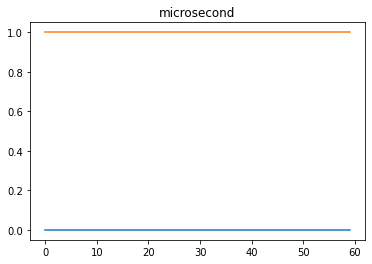

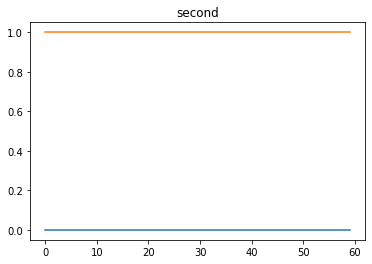

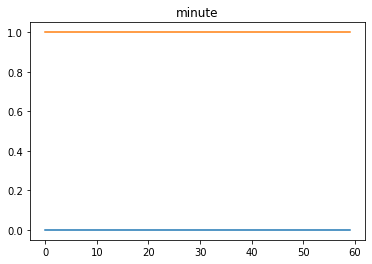

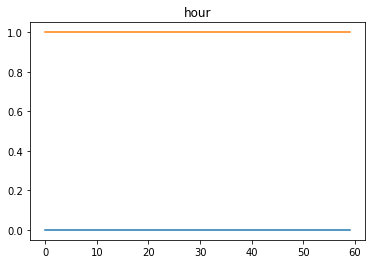

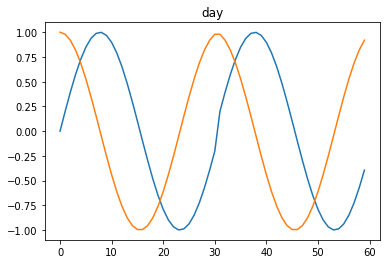

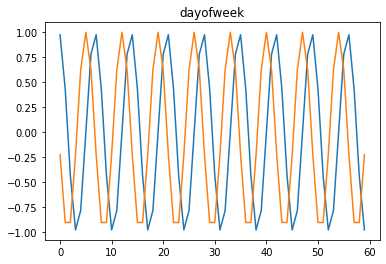

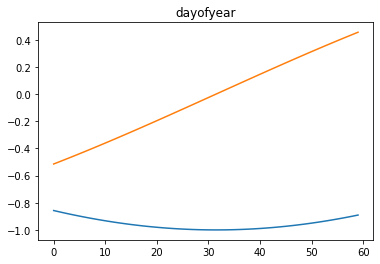

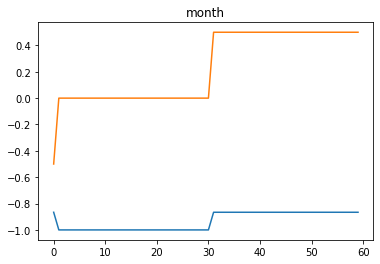

In [116]:

tdf = li_nU[0] 
for freq in ['microsecond', 'second', 'minute', 'hour', 'day', 'dayofweek', 'dayofyear', 'month']:
    tdf = pd.DataFrame(pd.date_range('2022-08-31', datetime.today()), columns=['Timestamps'])
    a,b = time_encoding(tdf.Timestamps, freq=freq)
    plt.plot(a)
    plt.plot(b)
    plt.title(freq)
    plt.show()


####Sensordaten von rechter Hand

In [117]:
all_files_2 = glob.glob(os.path.join(path_dir_normalUser_RH , "*.csv"))
re_nU = []
for filename in all_files_2:
    df = pd.read_csv(filename, index_col=None, header=0)
    re_nU.append(df)       
re_nU[1]

,Gravity_X,Gravity_Y,Gravity_Z,Timestamps
0,0.00,0.04,9.81,13772928377d 10h 19m 26s
1,0.01,0.03,9.81,13772930652d 22h 8m 38s
2,0.01,0.03,9.81,13772932928d 9h 30m 56s
3,0.01,0.03,9.81,13772935203d 21h 19m 16s
4,0.01,0.04,9.81,13772937479d 8h 39m 49s
...,...,...,...,...
437,0.04,0.01,9.81,13773922742d 19h 58m 24s
438,0.05,0.01,9.81,13773925018d 6h 24m 16s
439,0.05,0.00,9.81,13773927293d 17h 16m 11s
440,0.04,0.01,9.81,13773929569d 3h 42m 55s


#### Erzeugen den Datensätze für den legitmeren User

In [118]:
df1 = pd.concat(re_nU, axis=0, ignore_index=True)
df2 = pd.concat(li_nU, axis=0, ignore_index=True)
df = [df1, df2]
df = pd.concat(df)
df['Classes'] = df.apply(lambda x: "legitimerUser", axis=1)
#  Move Timestamps Column To Be The Last In Pandas
df_nU = df.reindex(columns = [col for col in df.columns if col != 'Timestamps'] + ['Timestamps'])

df_nU.head(10)

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,classes,Accelerometer_Z,Timestamps,Gyroscope_Y,Classes,Timestamps
0,0.03,-0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772928377d 10h 19m 26s
1,0.02,-0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772930652d 22h 8m 38s
2,-0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772932928d 9h 30m 56s
3,-0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772935203d 21h 19m 16s
4,0.00,-0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772937479d 8h 39m 49s
5,-0.02,0.01,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772939754d 20h 25m 33s
6,0.02,-0.01,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772942030d 7h 46m 6s
7,0.10,0.02,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772944305d 19h 30m 58s
8,-0.50,-1.03,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772946581d 6h 49m 47s
9,0.09,-4.36,2.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772948856d 18h 32m 55s


#### Entfernen der NaN-Werten und ersetzen mit Nullen der legitimeren Nutzer

In [119]:
df_sensordata_nU = df_nU.fillna(0)
df_sensordata_nU.isnull().sum()
df_sensordata_nU.head(10)

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,classes,Accelerometer_Z,Timestamps,Gyroscope_Y,Classes,Timestamps
0,0.03,-0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772928377d 10h 19m 26s
1,0.02,-0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772930652d 22h 8m 38s
2,-0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772932928d 9h 30m 56s
3,-0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772935203d 21h 19m 16s
4,0.00,-0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772937479d 8h 39m 49s
5,-0.02,0.01,-0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772939754d 20h 25m 33s
6,0.02,-0.01,-0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772942030d 7h 46m 6s
7,0.10,0.02,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772944305d 19h 30m 58s
8,-0.50,-1.03,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772946581d 6h 49m 47s
9,0.09,-4.36,2.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772948856d 18h 32m 55s


####Enfernen des letzten Spalten

In [120]:
df_sensordata_nU = df_sensordata_nU.iloc[:, :-1]
df_sensordata_nU

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,classes,Accelerometer_Z,Timestamps,Gyroscope_Y,Classes
0,0.03,-0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
1,0.02,-0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
2,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
3,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
4,0.00,-0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0.00,0.00,0.0,0.0,0.0,0.0,-12.99,0.0,6.66,0.0,0.0,0.0,-4.22,legitimerUser
521,0.00,0.00,0.0,0.0,0.0,0.0,6.52,0.0,11.58,0.0,0.0,0.0,0.52,legitimerUser
522,0.00,0.00,0.0,0.0,0.0,0.0,28.91,0.0,34.16,0.0,0.0,0.0,-11.84,legitimerUser
523,0.00,0.00,0.0,0.0,0.0,0.0,21.57,0.0,2.46,0.0,0.0,0.0,-2.69,legitimerUser


In [121]:
new_cols = ['Accelerometer_X', 'Accelerometer_Y', ' Accelerometer_Z', 
       'Gravity_X', 'Gravity_Y', 'Gravity_Z', 'Gyroscope_X', ' Gyroscope_Y',
       'Gyroscope_Z', ' Timestamps', 'Classes']
df_sensordata_nU=df_sensordata_nU.reindex(columns=new_cols)
df_sensordata_nU

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Timestamps,Classes
0,0.03,-0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
1,0.02,-0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
2,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
3,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
4,0.00,-0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
...,...,...,...,...,...,...,...,...,...,...,...
520,0.00,0.00,0.0,0.0,0.0,0.0,-12.99,-4.22,6.66,0.0,legitimerUser
521,0.00,0.00,0.0,0.0,0.0,0.0,6.52,0.52,11.58,0.0,legitimerUser
522,0.00,0.00,0.0,0.0,0.0,0.0,28.91,-11.84,34.16,0.0,legitimerUser
523,0.00,0.00,0.0,0.0,0.0,0.0,21.57,-2.69,2.46,0.0,legitimerUser


####Erzeugen der illegtimen Nutzer-Datensatz

In [122]:
all_files = glob.glob(os.path.join(path_dir_riskuser , "*.csv"))
re_rU = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    re_rU.append(df)       
re_rU[0]

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Timestamps
0,-0.07,0.09,-0.01,803629962002317
1,0.03,-0.06,0.13,803630158532577
2,0.03,-0.10,-0.11,803630355061327
3,-0.15,-2.07,2.22,803630551591640
4,1.24,-3.23,3.35,803630748120390
...,...,...,...,...
170,-0.51,1.11,0.51,803663372344635
171,-0.68,-0.09,1.84,803663568879479
172,-1.03,-1.38,1.88,803663765412708
173,-0.84,-1.50,0.40,803663961947604


####Zusammenführen der Raw Datensätze

In [123]:
df = pd.concat(re_rU, axis=0, ignore_index=True)
df['Classes'] = df.apply(lambda x: "illegitimerUser", axis=1)
#  Move Timestamps Column To Be The Last In Pandas
df_rU = df.reindex(columns = [col for col in df.columns if col != 'Timestamps'] + ['Timestamps'])

df_rU.head(10)

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Timestamps,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Classes,Timestamps
0,-0.07,0.09,-0.01,8.036300e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
1,0.03,-0.06,0.13,8.036302e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
2,0.03,-0.10,-0.11,8.036304e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
3,-0.15,-2.07,2.22,8.036306e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
4,1.24,-3.23,3.35,8.036307e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
5,0.00,-2.30,3.18,8.036309e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
6,0.41,-1.82,0.42,8.036311e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
7,-0.17,0.05,-3.14,8.036313e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
8,-0.15,4.17,-4.83,8.036315e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
9,-1.74,2.83,-3.15,8.036317e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN


####Entfernen der NaN-Werten und ersetzen mit Nullen der illegitimer 

In [124]:
df_sensordata_rU = df_rU.fillna(0)
df_sensordata_rU.isnull().sum()
df_sensordata_rU.head(10)

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Timestamps,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Classes,Timestamps
0,-0.07,0.09,-0.01,8.036300e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
1,0.03,-0.06,0.13,8.036302e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
2,0.03,-0.10,-0.11,8.036304e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
3,-0.15,-2.07,2.22,8.036306e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
4,1.24,-3.23,3.35,8.036307e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
5,0.00,-2.30,3.18,8.036309e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
6,0.41,-1.82,0.42,8.036311e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
7,-0.17,0.05,-3.14,8.036313e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
8,-0.15,4.17,-4.83,8.036315e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
9,-1.74,2.83,-3.15,8.036317e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0


####Entfernen der letzten Spalten des Datensatzes

In [125]:
df_sensordata_rU = df_sensordata_rU.iloc[:, :-1]
df_sensordata_rU

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Timestamps,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Classes
0,-0.07,0.09,-0.01,8.036300e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
1,0.03,-0.06,0.13,8.036302e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
2,0.03,-0.10,-0.11,8.036304e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
3,-0.15,-2.07,2.22,8.036306e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
4,1.24,-3.23,3.35,8.036307e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
...,...,...,...,...,...,...,...,...,...,...,...
520,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.0,-12.99,-4.22,6.66,illegitimerUser
521,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.0,6.52,0.52,11.58,illegitimerUser
522,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.0,28.91,-11.84,34.16,illegitimerUser
523,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.0,21.57,-2.69,2.46,illegitimerUser


#### Erzeugen des finalen Datensatzes für den SVM-Algo

In [126]:
new_cols = ['Accelerometer_X', 'Accelerometer_Y', ' Accelerometer_Z', 
       'Gravity_X', 'Gravity_Y', 'Gravity_Z', 'Gyroscope_X', ' Gyroscope_Y',
       'Gyroscope_Z', ' Timestamps', 'Classes']
df_sensordata_rU=df_sensordata_rU.reindex(columns=new_cols)
df_sensordata_rU

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Timestamps,Classes
0,-0.07,0.09,-0.01,0.0,0.0,0.0,0.00,0.00,0.00,8.036300e+14,illegitimerUser
1,0.03,-0.06,0.13,0.0,0.0,0.0,0.00,0.00,0.00,8.036302e+14,illegitimerUser
2,0.03,-0.10,-0.11,0.0,0.0,0.0,0.00,0.00,0.00,8.036304e+14,illegitimerUser
3,-0.15,-2.07,2.22,0.0,0.0,0.0,0.00,0.00,0.00,8.036306e+14,illegitimerUser
4,1.24,-3.23,3.35,0.0,0.0,0.0,0.00,0.00,0.00,8.036307e+14,illegitimerUser
...,...,...,...,...,...,...,...,...,...,...,...
520,0.00,0.00,0.00,0.0,0.0,0.0,-12.99,-4.22,6.66,0.000000e+00,illegitimerUser
521,0.00,0.00,0.00,0.0,0.0,0.0,6.52,0.52,11.58,0.000000e+00,illegitimerUser
522,0.00,0.00,0.00,0.0,0.0,0.0,28.91,-11.84,34.16,0.000000e+00,illegitimerUser
523,0.00,0.00,0.00,0.0,0.0,0.0,21.57,-2.69,2.46,0.000000e+00,illegitimerUser


#### Zusammenführen der beiden finalen Datensätze 

In [127]:
from pandas import concat

df_sensordata = concat([df_sensordata_nU, df_sensordata_rU], axis=0, ignore_index=True)
df_sensordata

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Timestamps,Classes
0,0.03,-0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
1,0.02,-0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
2,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
3,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
4,0.00,-0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
...,...,...,...,...,...,...,...,...,...,...,...
2371,0.00,0.00,0.0,0.0,0.0,0.0,-12.99,-4.22,6.66,0.0,illegitimerUser
2372,0.00,0.00,0.0,0.0,0.0,0.0,6.52,0.52,11.58,0.0,illegitimerUser
2373,0.00,0.00,0.0,0.0,0.0,0.0,28.91,-11.84,34.16,0.0,illegitimerUser
2374,0.00,0.00,0.0,0.0,0.0,0.0,21.57,-2.69,2.46,0.0,illegitimerUser


Der Trainingsdatensatz hat also 11 Spalten / Merkmale (einschließlich des Ziels / der Klasse) und 2376 Zeilen oder Datenpunkte.

Auch das Ziel ist Legitimität. Wie in der Datenbeschreibung erwähnt, hat es 2 eindeutige Werte. Lassen Sie uns auch diese im nächsten Schritt überprüfen.

In [128]:
df_sensordata.isnull().values.any()

False

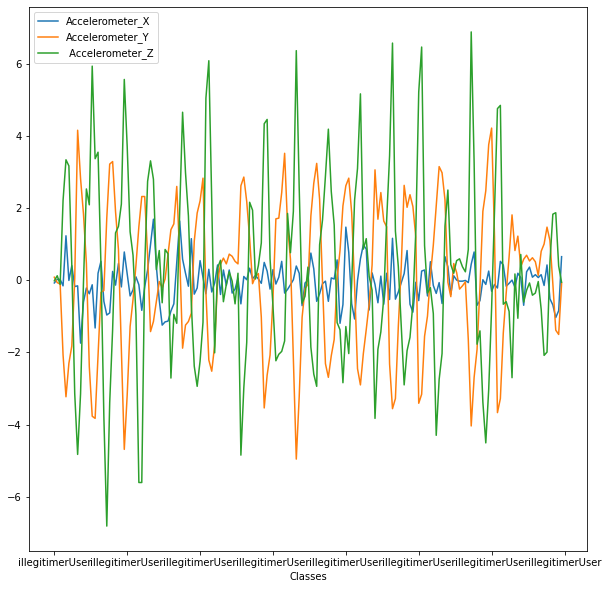

In [129]:
# plot sensordaten: Accelerometer, gyroscope, Gravity

# plot multiple columns such as population and year from dataframe
df.plot(x='Classes', y=['Accelerometer_X', 'Accelerometer_Y', ' Accelerometer_Z'],
        kind="line", figsize=(10, 10))
 
# display plot
plt.show()

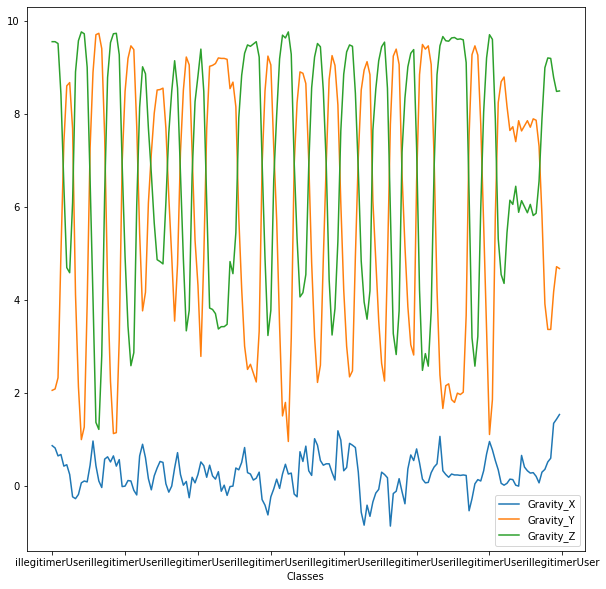

In [130]:
# plot multiple columns such as population and year from dataframe
df.plot(x='Classes', y=['Gravity_X', 'Gravity_Y', 'Gravity_Z'],
        kind="line", figsize=(10, 10))
 
# display plot
plt.show()
     

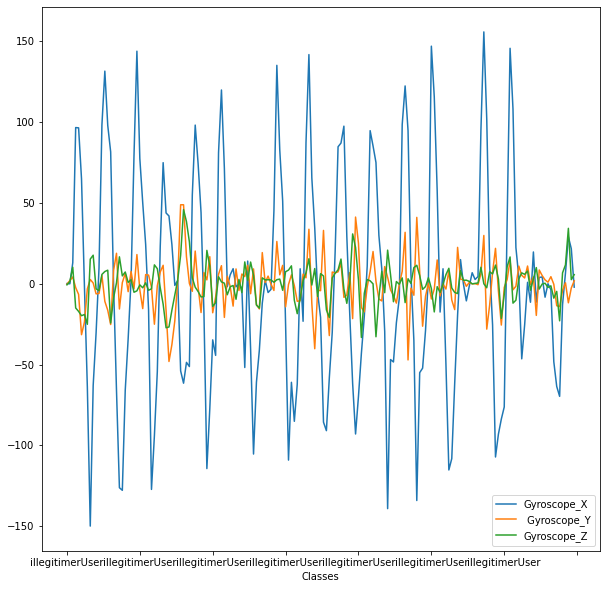

In [131]:
  # plot multiple columns such as population and year from dataframe
df.plot(x='Classes', y=['Gyroscope_X', ' Gyroscope_Y','Gyroscope_Z'],
        kind="line", figsize=(10, 10))
 
# display plot
plt.show() 

In [132]:
def weighted_mean(x):
    arr = np.ones((1, x.shape[1]))
    arr[:, :2] = (x[:, :2] * x[:, 2]).sum(axis=0) / x[:, 2].sum()
    return arr

In [133]:
df_features = df_sensordata.values[:, :-2]

In [134]:
df_features = df_sensordata[['Accelerometer_X', 'Accelerometer_Y', ' Accelerometer_Z', 
       'Gravity_X', 'Gravity_Y', 'Gravity_Z', 'Gyroscope_X', ' Gyroscope_Y',
       'Gyroscope_Z']]

In [135]:
df_features= df_features.expanding().agg([np.sum, np.mean, np.std])

In [136]:
df_features[0:10]

Accelerometer_X                     Accelerometer_Y                      \
              sum      mean       std             sum      mean       std   
0            0.03  0.030000       NaN           -0.01 -0.010000       NaN   
1            0.05  0.025000  0.007071           -0.02 -0.010000  0.000000   
2            0.05  0.016667  0.015275           -0.02 -0.006667  0.005774   
3            0.05  0.012500  0.015000           -0.02 -0.005000  0.005774   
4            0.05  0.010000  0.014142           -0.02 -0.004000  0.005477   
5            0.03  0.005000  0.017607           -0.01 -0.001667  0.007528   
6            0.05  0.007143  0.017043           -0.02 -0.002857  0.007559   
7            0.15  0.018750  0.036425            0.00  0.000000  0.010690   
8           -0.35 -0.038889  0.176242           -1.03 -0.114444  0.343479   
9           -0.26 -0.026000  0.171088           -5.39 -0.539000  1.381066   

   Accelerometer_Z           Gravity_X  ... Gravity_Z Gyroscope_X            \
               sum mean  std       sum  ...       std         sum mean  std   
0              0.0  0.0  NaN       0.0  ...       NaN         0.0  0.0  NaN   
1              0.0  0.0  0.0       0.0  ...       0.0         0.0  0.0  0.0   
2              0.0  0.0  0.0       0.0  ...       0.0         0.0  0.0  0.0   
3              0.0  0.0  0.0       0.0  ...       0.0         0.0  0.0  0.0   
4              0.0  0.0  0.0       0.0  ...       0.0         0.0  0.0  0.0   
5              0.0  0.0  0.0       0.0  ...       0.0         0.0  0.0  0.0   
6              0.0  0.0  0.0       0.0  ...       0.0         0.0  0.0  0.0   
7              0.0  0.0  0.0       0.0  ...       0.0         0.0  0.0  0.0   
8              0.0  0.0  0.0       0.0  ...       0.0         0.0  0.0  0.0   
9              0.0  0.0  0.0       0.0  ...       0.0         0.0  0.0  0.0   

   Gyroscope_Y           Gyroscope_Z            
           sum mean  std         sum mean  std  
0          0.0  0.0  NaN         0.0  0.0  NaN  
1          0.0  0.0  0.0         0.0  0.0  0.0  
2          0.0  0.0  0.0         0.0  0.0  0.0  
3          0.0  0.0  0.0         0.0  0.0  0.0  
4          0.0  0.0  0.0         0.0  0.0  0.0  
5          0.0  0.0  0.0         0.0  0.0  0.0  
6          0.0  0.0  0.0         0.0  0.0  0.0  
7          0.0  0.0  0.0         0.0  0.0  0.0  
8          0.0  0.0  0.0         0.0  0.0  0.0  
9          0.0  0.0  0.0         0.0  0.0  0.0  

[10 rows x 27 columns]

In [137]:
df_features.rolling(2, method="table", min_periods=0).apply(weighted_mean, raw=True, engine="numba")  # noqa:E501

Accelerometer_X                Accelerometer_Y            \
                 sum      mean  std             sum mean  std   
0                NaN       NaN  1.0             1.0  1.0  1.0   
1                NaN       NaN  1.0             1.0  1.0  1.0   
2           0.031643  0.028482  1.0             1.0  1.0  1.0   
3           0.050455  0.014451  1.0             1.0  1.0  1.0   
4           0.051472  0.010919  1.0             1.0  1.0  1.0   
...              ...       ...  ...             ...  ...  ...   
2371      -62.896588 -0.026516  1.0             1.0  1.0  1.0   
2372      -62.896585 -0.026505  1.0             1.0  1.0  1.0   
2373      -62.896583 -0.026494  1.0             1.0  1.0  1.0   
2374      -62.896580 -0.026483  1.0             1.0  1.0  1.0   
2375      -62.896577 -0.026472  1.0             1.0  1.0  1.0   

      Accelerometer_Z           Gravity_X  ... Gravity_Z Gyroscope_X       \
                  sum mean  std       sum  ...       std         sum mean   
0                 1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   
1                 1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   
2                 1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   
3                 1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   
4                 1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   
...               ...  ...  ...       ...  ...       ...         ...  ...   
2371              1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   
2372              1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   
2373              1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   
2374              1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   
2375              1.0  1.0  1.0       1.0  ...       1.0         1.0  1.0   

           Gyroscope_Y           Gyroscope_Z            
      std          sum mean  std         sum mean  std  
0     1.0          1.0  1.0  1.0         1.0  1.0  1.0  
1     1.0          1.0  1.0  1.0         1.0  1.0  1.0  
2     1.0          1.0  1.0  1.0         1.0  1.0  1.0  
3     1.0          1.0  1.0  1.0         1.0  1.0  1.0  
4     1.0          1.0  1.0  1.0         1.0  1.0  1.0  
...   ...          ...  ...  ...         ...  ...  ...  
2371  1.0          1.0  1.0  1.0         1.0  1.0  1.0  
2372  1.0          1.0  1.0  1.0         1.0  1.0  1.0  
2373  1.0          1.0  1.0  1.0         1.0  1.0  1.0  
2374  1.0          1.0  1.0  1.0         1.0  1.0  1.0  
2375  1.0          1.0  1.0  1.0         1.0  1.0  1.0  

[2376 rows x 27 columns]

In [138]:
df_features.expanding().agg([np.sum, np.mean, np.std])

Accelerometer_X                                                        \
                 sum                              mean                       
                 sum       mean        std         sum      mean       std   
0               0.03   0.030000        NaN    0.030000  0.030000       NaN   
1               0.08   0.040000   0.014142    0.055000  0.027500  0.003536   
2               0.13   0.043333   0.011547    0.071667  0.023889  0.006736   
3               0.18   0.045000   0.010000    0.084167  0.021042  0.007917   
4               0.23   0.046000   0.008944    0.094167  0.018833  0.008449   
...              ...        ...        ...         ...       ...       ...   
2371      -115769.52 -48.806712  14.969064 -124.265467 -0.052388  0.032164   
2372      -115832.41 -48.812646  14.968700 -124.291970 -0.052378  0.032162   
2373      -115895.30 -48.818576  14.968334 -124.318461 -0.052367  0.032159   
2374      -115958.19 -48.824501  14.967967 -124.344941 -0.052356  0.032157   
2375      -116021.08 -48.830421  14.967597 -124.371410 -0.052345  0.032154   

                                     Accelerometer_Y  ...  Gyroscope_Y  \
             std                                 sum  ...          std   
             sum      mean       std             sum  ...          std   
0            NaN       NaN       NaN           -0.01  ...          NaN   
1       0.007071  0.007071       NaN           -0.03  ...          NaN   
2       0.022346  0.011173  0.005801           -0.05  ...     0.000000   
3       0.037346  0.012449  0.004659           -0.07  ...     0.000000   
4       0.051488  0.012872  0.003897           -0.09  ...     0.000000   
...          ...       ...       ...             ...  ...          ...   
2371  990.192209  0.417626  0.113057        76241.46  ...     2.068032   
2372  990.516481  0.417587  0.113050        76297.32  ...     2.069748   
2373  990.840686  0.417548  0.113042        76353.18  ...     2.071462   
2374  991.164822  0.417508  0.113035        76409.04  ...     2.073172   
2375  991.488891  0.417469  0.113027        76464.90  ...     2.074875   

     Gyroscope_Z                                                          \
             sum                                mean                       
             sum        mean         std         sum      mean       std   
0           0.00    0.000000         NaN    0.000000  0.000000       NaN   
1           0.00    0.000000    0.000000    0.000000  0.000000  0.000000   
2           0.00    0.000000    0.000000    0.000000  0.000000  0.000000   
3           0.00    0.000000    0.000000    0.000000  0.000000  0.000000   
4           0.00    0.000000    0.000000    0.000000  0.000000  0.000000   
...          ...         ...         ...         ...       ...       ...   
2371   607912.24  256.286779  242.670281  357.576274  0.150749  0.143772   
2372   608453.48  256.406861  242.689630  357.804356  0.150781  0.143751   
2373   609028.88  256.541230  242.726799  358.046732  0.150820  0.143733   
2374   609606.74  256.676522  242.765223  358.290041  0.150859  0.143715   
2375   610190.15  256.814036  242.806650  358.535584  0.150899  0.143698   

                                       
              std                      
              sum      mean       std  
0             NaN       NaN       NaN  
1        0.000000  0.000000       NaN  
2        0.000000  0.000000  0.000000  
3        0.000000  0.000000  0.000000  
4        0.000000  0.000000  0.000000  
...           ...       ...       ...  
2371  8388.037723  3.537764  2.835978  
2372  8394.462369  3.538981  2.836000  
2373  8400.923304  3.540212  2.836036  
2374  8407.383038  3.541442  2.836072  
2375  8413.842330  3.542670  2.836106  

[2376 rows x 81 columns]

In [139]:
df_sensordata["Classes"].unique()

array(['legitimerUser', 'illegitimerUser'], dtype=object)

In [140]:
pd.crosstab(index = df_sensordata["Classes"],columns="count")

col_0,count
Classes,
illegitimerUser,525
legitimerUser,1851


#### Visualisierung der Klassenverteilung

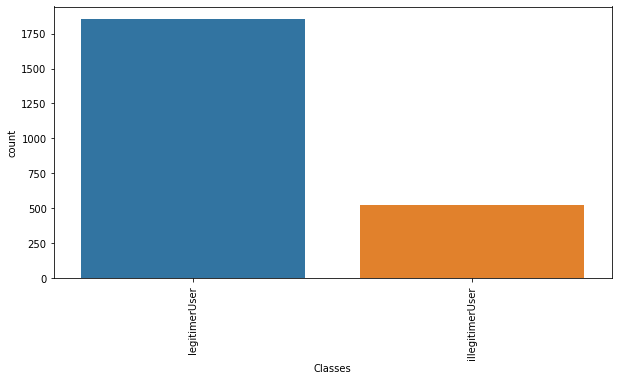

In [141]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Classes", data=df_sensordata)
plt.xticks(x = df_sensordata['Classes'],  rotation='vertical')
plt.show()

#### Initialisieren von 2 features variablen

In [188]:
X = df_sensordata.values[:, :-2]
Y = df_sensordata.values[:, -1]
X = pd.DataFrame(X)
X.shape, Y.shape

((2376, 9), (2376,))

In [189]:
X

,0,1,2,3,4,5,6,7,8
0,0.03,-0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02,-0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2371,0.0,0.0,0.0,0.0,0.0,0.0,-12.99,-4.22,6.66
2372,0.0,0.0,0.0,0.0,0.0,0.0,6.52,0.52,11.58
2373,0.0,0.0,0.0,0.0,0.0,0.0,28.91,-11.84,34.16
2374,0.0,0.0,0.0,0.0,0.0,0.0,21.57,-2.69,2.46


In [194]:
Y

array(['legitimerUser', 'legitimerUser', 'legitimerUser', ...,
       'illegitimerUser', 'illegitimerUser', 'illegitimerUser'],
      dtype=object)

## Überprüfen Sie die Datentypen der einzelnen Merkmale. 



In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2376 non-null   object
 1   1       2376 non-null   object
 2   2       2376 non-null   object
 3   3       2376 non-null   object
 4   4       2376 non-null   object
 5   5       2376 non-null   object
 6   6       2376 non-null   object
 7   7       2376 non-null   object
 8   8       2376 non-null   object
dtypes: object(9)
memory usage: 167.2+ KB


#### check User

In [144]:
# Convert all columns to floats
X = X.astype(float)
print(X.dtypes)

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object


Alle Features sind vom Typ float64 und alle 9 sind numerische Features, außer Class (y). Wir müssen Label Encoder machen und sie in numeirc umwandeln.

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2376 non-null   float64
 1   1       2376 non-null   float64
 2   2       2376 non-null   float64
 3   3       2376 non-null   float64
 4   4       2376 non-null   float64
 5   5       2376 non-null   float64
 6   6       2376 non-null   float64
 7   7       2376 non-null   float64
 8   8       2376 non-null   float64
dtypes: float64(9)
memory usage: 167.2 KB


In [146]:
Y[1]

'legitimerUser'

In [147]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 9


####Umwandlung von nicht numerischen in numerische Bezeichnungen

In [148]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [149]:
# encoding train labels 
encoder.fit(Y)
y = encoder.transform(Y)
y.shape

(2376,)

In [150]:
encoder.classes_

array(['illegitimerUser', 'legitimerUser'], dtype=object)

In [151]:
y

array([1, 1, 1, ..., 0, 0, 0])

#### Feature-Skalierung

In [152]:
# Scaling the feature 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [153]:
X = scaler.fit_transform(X)
X[1]


array([ 0.14342208, -0.03019968, -0.04442681, -0.23942335, -0.52969269,
       -0.66097646, -0.00215101,  0.01493005, -0.03802191])

### Plot der Datesätze
#### Verteilung der Daten besser verstehen

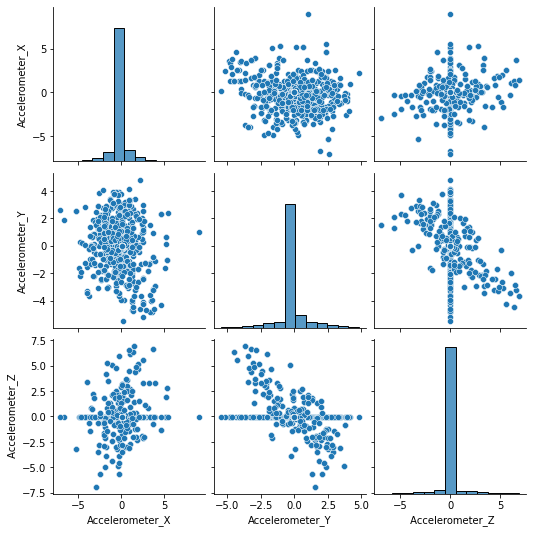

In [154]:
df = pd.DataFrame(X[:,:3], columns = ['Accelerometer_X', 'Accelerometer_Y', ' Accelerometer_Z'])

sns.pairplot(data=df)
plt.show()

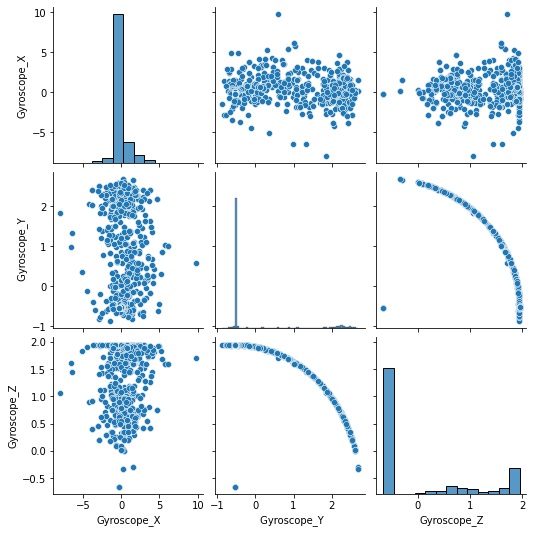

In [155]:
df = pd.DataFrame(X[:,3:6], columns = ['Gyroscope_X', ' Gyroscope_Y','Gyroscope_Z'])

sns.pairplot(data=df)
plt.show()

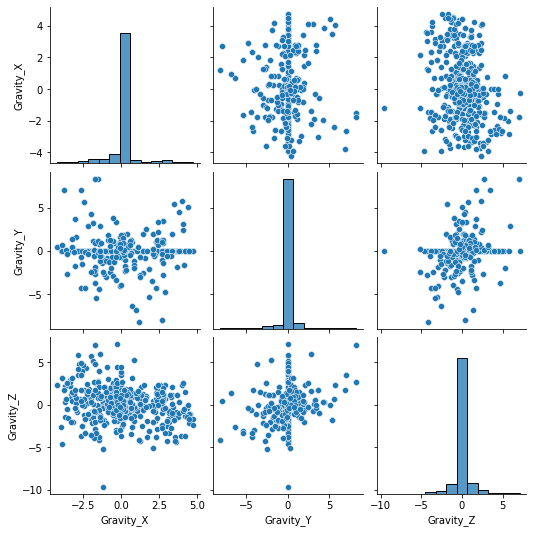

In [156]:
df = pd.DataFrame(X[:,6:9], columns = ['Gravity_X', 'Gravity_Y', 'Gravity_Z'])

sns.pairplot(data=df)
plt.show()

### Ünüberwaches Lernen: KMeans

In [157]:
X

array([[ 1.74286207e-01, -3.01996788e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 1.43422077e-01, -3.01996788e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       ...,
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         8.17833931e-01, -1.99680341e+00,  5.25159697e+00],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         6.09646818e-01, -4.42127637e-01,  3.42904975e-01],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -6.42667817e-02,  3.08874209e-01,  8.21386308e-01]])

In [158]:
from sklearn.cluster import KMeans


start_time = time.time()
km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X[:,:6])
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")



Elapsed time to compute the importances: 0.065 seconds


In [159]:
X

array([[ 1.74286207e-01, -3.01996788e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 1.43422077e-01, -3.01996788e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       ...,
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         8.17833931e-01, -1.99680341e+00,  5.25159697e+00],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         6.09646818e-01, -4.42127637e-01,  3.42904975e-01],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -6.42667817e-02,  3.08874209e-01,  8.21386308e-01]])

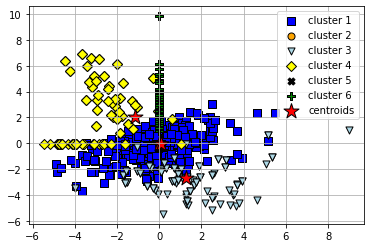

In [160]:
# plot the 6 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='blue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


plt.scatter(
    X[y_km == 2, 1], X[y_km == 2, 2],
    s=50, c='yellow',
    marker='D', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='black',
    marker='X', edgecolor='black',
    label='cluster 5'
)

plt.scatter(
    X[y_km == 3, 1], X[y_km == 3, 3],
    s=50, c='green',
    marker= 'P', edgecolor='black',
    label='cluster 6'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [161]:
X

array([[ 1.74286207e-01, -3.01996788e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 1.43422077e-01, -3.01996788e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       ...,
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         8.17833931e-01, -1.99680341e+00,  5.25159697e+00],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         6.09646818e-01, -4.42127637e-01,  3.42904975e-01],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -6.42667817e-02,  3.08874209e-01,  8.21386308e-01]])

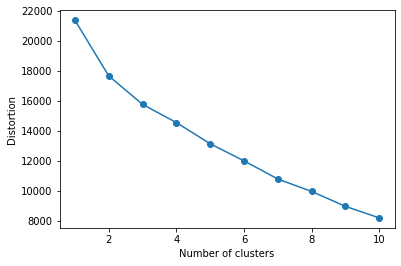

In [162]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Logistik Regession

In [163]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

elapsed_time = time.time() - start_time
print('Model Genauigkeit score für Logistik Regression : {0:0.4f}'. format(pipe.score(X_test, y_test)))
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

Model Genauigkeit score für Logistik Regression : 0.7828
Elapsed time to compute the importances: 0.013 seconds


In [164]:
X_train

array([[ 3.69279698e+00, -3.12135414e+00, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [-2.88675738e-01,  1.32161714e+00, -5.69608739e+00, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 4.21199244e-01,  2.56528862e+00, -3.04655668e+00, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       ...,
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         2.08170556e+00,  1.49300476e-02,  4.18780656e-01],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         5.74476243e-01,  1.49300476e-02,  1.85732162e+00],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02]])

In [165]:
X_test

array([[ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -3.04220866e-01, -2.68819519e-01,  2.90256543e-01],
       [-4.82570279e+00,  2.85224246e-01, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       ...,
       [ 5.75519892e-01,  7.08793516e-01, -8.50367716e-01, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         2.05396856e-02,  1.86185088e+00,  1.17134353e+00],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02]])

In [166]:
X

array([[ 1.74286207e-01, -3.01996788e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 1.43422077e-01, -3.01996788e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       ...,
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         8.17833931e-01, -1.99680341e+00,  5.25159697e+00],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         6.09646818e-01, -4.42127637e-01,  3.42904975e-01],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -6.42667817e-02,  3.08874209e-01,  8.21386308e-01]])

#### Lassen Sie uns das KNN-Klassifikatormodell erstellen

In [167]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
# Train the model using the training sets
model.fit(X_train,y_train)
elapsed_time = time.time() - start_time
#Predict Output
predicted= model.predict([[0.14342208, -0.03019968, -0.04442681, -0.23942335, -0.52969269,
       -0.66097646, -0.00215101,  0.01493005, -0.03802191]]) # 0:Overcast, 2:Mild
print('Die Vorhergesate Klasse ist : ', predicted)
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Die Vorhergesate Klasse ist :  [1]
Elapsed time to compute the importances: 0.004 seconds


In [168]:
X.shape

(2376, 9)

#### X und y in Trainings- und Validierungsmengen aufteilen

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1900, 9), (476, 9), (1900,), (476,))

In [170]:
X_train

array([[ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -3.04015125e+00,  3.71726720e+00,  1.73499144e+00],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         2.77575715e+00,  3.43351764e+00, -3.80236717e-01],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02],
       ...,
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -1.47194069e+00,  7.54038200e-01,  2.03849417e+00],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
         5.28527588e-01,  1.49300476e-02,  6.46407698e-01],
       [ 8.16938178e-02, -2.11875667e-02, -4.44268139e-02, ...,
        -2.15100804e-03,  1.49300476e-02, -3.80219121e-02]])

#### Einfaches LSTM für die Sequenzklassifizierung
Die erste Schicht ist die eingebettete Schicht, die Vektoren mit 32 Längen verwendet, um jedes Wort darzustellen. Die nächste Schicht ist die LSTM-Schicht mit 100 Speichereinheiten (Smart Neurons). Da es sich um ein Klassifizierungsproblem handelt, verwenden Sie schließlich eine dichte Ausgabeschicht mit einem einzelnen Neuron und einer Sigmoid-Aktivierungsfunktion, um 0- oder 1-Vorhersagen für die beiden Klassen (gut und schlecht) im Problem zu treffen.

Da es sich um ein binäres Klassifizierungsproblem handelt, wird log loss als Verlustfunktion verwendet ( binary_crossentropy in Keras). Der effiziente ADAM-Optimierungsalgorithmus wird verwendet. Das Modell ist nur für zwei Epochen geeignet, weil es das Problem schnell überpasst. Eine große Stapelgröße von 64 Bewertungen wird verwendet, um Gewichtsaktualisierungen zu verteilen.

In [171]:
X_train.shape

(1900, 9)

In [172]:
X_valid.shape

(476, 9)

In [173]:
import tensorflow as tf
# from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

# fix random seed for reproducibility
tf.random.set_seed(9)
# load the dataset but only keep the top sensordata words, zero the rest
sensordata_length = 2376
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 237
x_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
x_valid = sequence.pad_sequences(X_valid, maxlen=max_review_length)


In [174]:
x_train.shape

(1900, 237)

In [175]:
x_valid.shape

(476, 237)

In [176]:
y_valid.shape

(476,)

In [177]:
y_train.shape

(1900,)

In [178]:
X.shape

(2376, 9)

In [179]:
y.shape

(2376,)

In [180]:
# print("Shape zu Beginn:\t",X.shape)

# im_cols = 9
# im_rows = int(X.shape[1] / im_cols)
# im_shape = (im_rows, im_cols)
# X = X.reshape(X.shape[0], *im_shape)

# print("Shape nach Umformung:\t",X.shape)


In [181]:
X.shape

(2376, 9)

In [195]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(sensordata_length, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#history = model.fit(x_train, y_train, epochs=5, batch_size=64)
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=50, batch_size=64)
# evaluate the model with the test data 
scores = model.evaluate(x_valid, y_valid, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 237, 32)           76032     
                                                                 
 lstm_12 (LSTM)              (None, 100)               53200     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 129,333
Trainable params: 129,333
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
30/30 [==============================] - 3s 36ms/step - loss: 0.5684 - accuracy: 0.7663 - val_loss: 0.5604 - val_accuracy: 0.7668
Epoch 2/5
30/30 [==============================] - 1s 17ms/step - loss: 0.5248 - accuracy: 0.7821 - val_loss: 0.5382 - val_accuracy: 0.7668
Epoch 3/5
30/30 [=========

In [196]:
...
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


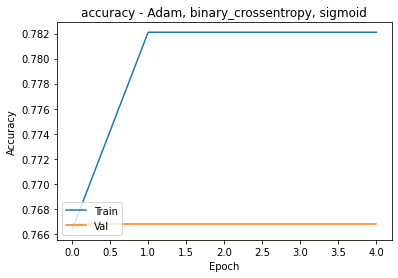

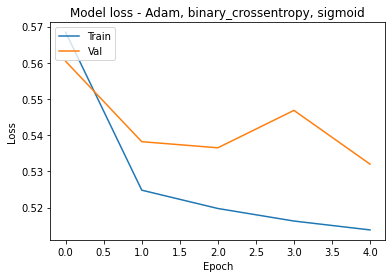

In [197]:
activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = 'Adam'
metrics = 'accuracy'
titledetails =  optimizer, loss, activation
titledetails = (', '.join(titledetails))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy - '+ titledetails)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - ' + titledetails)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model

#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5

MODEDL_PATH = '/content/drive/MyDrive/Masterarbeit_2021-2022/models/userRecognitionSensordata.h5'
tf.keras.models.save_model(
model,
MODEDL_PATH,
overwrite=True,
include_optimizer=True,
save_format=None
)

In [200]:
import tensorflow as tf
# from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(9)
# load the dataset but only keep the top sensordata words, zero the rest
sensordata_length = 2376
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 237
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(sensordata_length, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, validation_data=(x_valid, y_valid), epochs=5, batch_size=64)
# print scores 
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 237, 32)           76032     
                                                                 
 lstm_14 (LSTM)              (None, 100)               53200     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 129,333
Trainable params: 129,333
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
30/30 [==============================] - 32s 990ms/step - loss: 0.5732 - accuracy: 0.7663 - val_loss: 0.5468 - val_accuracy: 0.7668
Epoch 2/5
30/30 [==============================] - 29s 979ms/step - loss: 0.5247 - accuracy: 0.7821 - val_loss: 0.5397 - val_accuracy: 0.7668
Epoch 3/5
30/30 [=====

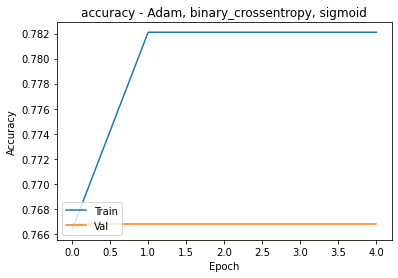

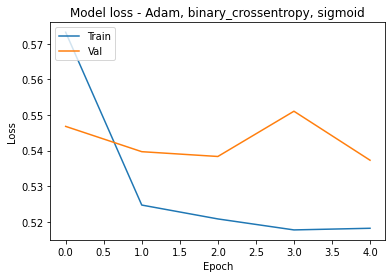

In [201]:
activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = 'Adam'
metrics = 'accuracy'
titledetails =  optimizer, loss, activation
titledetails = (', '.join(titledetails))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy - '+ titledetails)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - ' + titledetails)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In diesem Diagramm sehen Sie die Trainings- und Validierungsergebnisse einer SVM für verschiedene Werte des Kernelparameters Gamma. Bei sehr niedrigen Gammawerten können Sie sehen, dass sowohl der Trainingswert als auch der Validierungswert niedrig sind. Das nennt man Underfitting. Mittlere Gamma-Werte führen zu hohen Werten für beide Bewertungen, d. h. der Klassifikator arbeitet ziemlich gut. Wenn Gamma zu hoch ist, wird der Klassifikator überangepasst, was bedeutet, dass die Trainingspunktzahl gut, aber die Validierungspunktzahl schlecht ist.

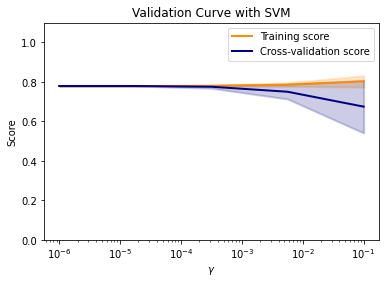

In [202]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

Scikit-learn definiert eine einfache API zum Erstellen von Visualisierungen für maschinelles Lernen. Das Hauptmerkmal dieser API besteht darin, schnelles Plotten und visuelle Anpassungen ohne Neuberechnung zu ermöglichen. Wir stellen DisplayKlassen bereit, die zwei Methoden zum Erstellen von Diagrammen verfügbar machen: from_estimatorund from_predictions. Die from_estimatorMethode nimmt einen angepassten Schätzer und einige Daten ( Xund y) und erstellt ein DisplayObjekt. Manchmal möchten wir die Vorhersagen nur einmal berechnen und sollten sie from_predictions stattdessen verwenden. Im folgenden Beispiel zeichnen wir eine ROC-Kurve für eine angepasste Support-Vektor-Maschine:

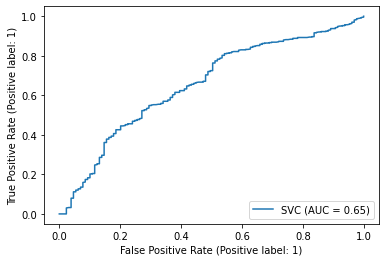

In [203]:
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

Das zurückgegebene svc_dispObjekt ermöglicht es uns, die bereits berechnete ROC-Kurve für SVC in zukünftigen Diagrammen weiter zu verwenden. In diesem Fall ist das svc_dispein RocCurveDisplay, das die berechneten Werte als Attribute mit den Namen roc_auc, fprund speichert tpr. Beachten Sie, dass wir die Vorhersagen von der Support-Vektor-Maschine erhalten und dann from_predictions anstelle von verwenden könnten from_estimator. Als nächstes trainieren wir einen Random-Forest-Klassifikator und zeichnen die zuvor berechnete Roc-Kurve erneut, indem wir die plotMethode des DisplayObjekts verwenden.

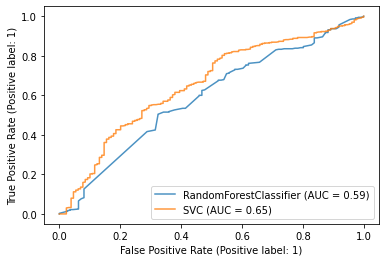

In [204]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_valid, y_valid, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

#### Das Modell trainieren
### SVM mit Standard-Hyperparametern ausführen
Standard-Hyperparameter bedeutet C=1.0, Kernel=rbf und Gamma=auto neben anderen Parametern.

In [205]:
import pickle
# instantiate classifier with default hyperparameters
svc = SVC() 
start_time = time.time()
# fit classifier to training set
svc.fit(X_train,y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(svc, open(filename, 'wb'))
# make predictions on test set
y_pred = svc.predict(X_valid)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Elapsed time to compute the importances: 0.148 seconds
Model accuracy score with default hyperparameters: 0.7668


In [206]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_valid, y_valid)
print(result)

0.7668067226890757


## Bewertung des Modells
Lassen Sie uns abschätzen, wie genau der Klassifikator oder das Modell den richtigen Nutzer vorhersagen kann.

In [207]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.7668067226890757


Zur weiteren Auswertung können Sie auch die Genauigkeit und den Wiedererkennungswert des Modells überprüfen.

In [208]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_valid, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_valid, y_pred))

Precision: 0.7668067226890757
Recall: 1.0


#### Hier sind y_valid die wahren Klassenbezeichnungen und y_pred die vorhergesagten Klassenbezeichnungen in der Testmenge.

####SVM mit rbf-Kernel und C=100.0 ausführen

Manchmal gibt es Ausreißer im Datensatz. In diesem Fall sollten wir den Wert von C erhöhen, da ein höheres C weniger Ausreißer bedeutet. Wir könnten also SVM mit Kernel=rbf und C=100.0 ausführen.

Wir werden mit verschiedenen Hyper-Parametern spielen.

In [209]:
# instantiate classifier with rbf kernel and C=100
svc = SVC(C=100.0) 

start_time = time.time()
# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred = svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with rbf kernel and C=100.0 : 0.7668
Elapsed time to compute the importances: 0.445 seconds


Wir sehen, dass wir mit C=100,0 eine höhere Genauigkeit erhalten, da ein höheres C weniger Ausreißer bedeutet. 

Jetzt werde ich den Wert von C=1000.0 weiter erhöhen und die Genauigkeit überprüfen.

### SVM mit rbf-Kernel und C=1000.0 ausführen

In [210]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


start_time = time.time()
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred = svc.predict(X_valid)
elapsed_time = time.time() - start_time
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with rbf kernel and C=1000.0 : 0.7710
Elapsed time to compute the importances: 4.022 seconds


#### Run SVM with linear kernel 
Run SVM with linear kernel and C=1.0

In [211]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


start_time = time.time()
# fit classifier to training set
linear_svc.fit(X_train,y_train)
# make predictions on test set
y_pred_test=linear_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred_test)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with linear kernel and C=1.0 : 0.7668
Elapsed time to compute the importances: 736.536 seconds


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 

start_time = time.time()
# fit classifier to training set
linear_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

#### Run SVM with linear kernel and C=1000.0

In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# make predictions on test set
start_time = time.time()
# fit classifier to training set
linear_svc1000.fit(X_train, y_train)

y_pred_test=linear_svc.predict(X_valid)
elapsed_time = time.time() - start_time


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

### Zeichnen Sie die Entscheidungsgrenzen-Hyperebene
In dieser Visualisierung sind alle Beobachtungen der Klasse 0 schwarz und Beobachtungen der Klasse 1 hellgrau. Die Hyperebene ist die Entscheidungsgrenze, die darüber entscheidet, wie neue Beobachtungen klassifiziert werden. Insbesondere wird jede Beobachtung oberhalb der Linie als Klasse 0 klassifiziert, während jede Beobachtung unterhalb der Linie als Klasse 1 klassifiziert wird.

In [ ]:
# # Plot data points and color using their class
# color = ['black' if c == 0 else 'lightgrey' for c in y]
# plt.scatter(X[:,0], X[:,1], c=color)

# # Create the hyperplane
# w = svc.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(-2.5, 2.5)
# yy = a * xx - (svc.intercept_[0]) / w[1]

# # Plot the hyperplane
# plt.plot(xx, yy)
# plt.axis("off"), plt.show();

Wir können sehen, dass wir mit C=100.0 und C=1000.0 keine höhere Genauigkeit als mit C=1.0 erzielen können.
## Vergleich der Genauigkeit von Trainings- und Testsatz
Jetzt vergleiche ich die Genauigkeit des Trainings- und des Testsatzes, um zu prüfen, ob die Anpassung zu hoch ist.

In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Wir sehen, dass die Genauigkeit des Trainingssets und des Test-Sets sehr vergleichbar sind.

## Überprüfung auf Über- und Unteranpassung

In [ ]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Validation set score: {:.4f}'.format(linear_svc.score(X_valid, y_valid)))

The training-set accuracy score is 51,43 while the validation-set accuracy to be 44,29. These two values are quite comparable. So, there is no question of overfitting.

## Vergleich der Modellgenauigkeit mit der Null-Genauigkeit
Die Modellgenauigkeit beträgt also 0,6625. Wir können jedoch nicht sagen, dass unser Modell aufgrund der obigen Genauigkeit sehr gut ist. Wir müssen es mit der Null-Genauigkeit vergleichen. Die Null-Genauigkeit ist die Genauigkeit, die erreicht werden kann, wenn immer die häufigste Klasse vorhergesagt wird.

Daher sollten wir zunächst die Klassenverteilung in der Validierungsmenge überprüfen.

In [ ]:
# check class distribution in validation set

y_valid

### SVM mit polynomialem Kernel ausführen
SVM mit polynomialem Kernel und C=1.0 ausführen

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
start_time = time.time()
y_pred_test=poly_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

### SVM mit polynomialem Kernel und C=100.0 ausführen

In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
start_time = time.time()
y_pred_test=poly_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
convert(elapsed_time)

Der polynomiale Kernel liefert eine schlechte Leistung. Möglicherweise passt er sich zu stark an die Trainingsmenge an.

### SVM mit sigmoidem Kernel ausführen
SVM mit sigmoidem Kernel und C=1.0 ausführen

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
start_time = time.time()
y_pred=sigmoid_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
convert(elapsed_time)

#### SVM mit sigmoidem Kernel und C=100.0 ausführen

In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 

# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)

# make predictions on test set
start_time = time.time()
y_pred=sigmoid_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
convert(elapsed_time)

Es ist zu erkennen, dass der Sigmoid-Kernel genauso schlecht abschneidet wie der Polynom-Kernel.

## Hyperparameter-Abstimmung mit Gittersuche und Kreuzvalidierung

In [ ]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
clf = svm_model.fit(X_train, y_train)

### Konfusionsmatrix und Genauigkeitswert

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_valid)
Y_pred_label = list(encoder.inverse_transform(Y_pred))
#Y_pred_label

In [ ]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_valid,Y_pred))
print("\n")
print(classification_report(y_valid,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , y_train,  zero_division=1))
print("Validation set score for SVM: %f" % final_model.score(X_valid  , y_valid, zero_division=1 ))

### Plot hyperplane Linear SVM python

In [ ]:
from sklearn import svm
fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, y)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

# Zusammenfassung
Wir erhalten die höchste Genauigkeit mit `rbf` und `linear` Kernel mit C=100.0. und die Genauigkeit ist 50%. Aus der obigen Analyse können wir schließen, dass die Genauigkeit unseres Klassifizierungsmodells sehr gut ist. Unser Modell leistet eine sehr gute Arbeit bei der Vorhersage der Klassenbezeichnungen.
**bold text**